<a href="https://colab.research.google.com/github/chamalar/IIIT-H-AIML/blob/master/Height_Gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
#Import data from Exel sheet
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [31]:

HG_Data=pd.read_excel("Height_Weight_Gender.xlsx")
#HG_Data=pd.read_csv("gender-weight-and-height-data.csv", sep=",", header=0, names=['Height', 'Weight','Gender'])
#print(HG_Data)
#Data=HG_Data[["Height (cm)","Weight (Kg)"]]
#Label=HG_Data[["Gender"]]
#print(type(Data))
print(HG_Data['Gender'].unique())

['Male' 'male' 'Female' 'Mamale' nan 'Femamal' 'Robo' 'M']


In [32]:
#######Preprocessing
HG_Data=HG_Data.replace('male','Male')
HG_Data=HG_Data.replace('Femamal','Female')
HG_Data=HG_Data.replace('M','Male')
print(HG_Data.groupby('Gender').size())

Gender
Female    29
Male      85
Mamale     1
Robo       1
dtype: int64


In [33]:
def label_gender (row):
   if row['Gender'] == 'Male' :
      return 1
   if row['Gender'] == 'Female':
      return 0
   return -1

In [34]:
HG_Data.apply (lambda row: label_gender(row), axis=1)

0      1
1      1
2      1
3      1
4      1
5      1
6      0
7      0
8      0
9      1
10     1
11     1
12     1
13     0
14     1
15     0
16     1
17     1
18     1
19     1
20     1
21     1
22     0
23     1
24     1
25     0
26     1
27     1
28     0
29     0
      ..
92     0
93     0
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102   -1
103    1
104    1
105    1
106    1
107   -1
108    1
109    1
110    0
111    1
112    1
113   -1
114    1
115    1
116    0
117    1
118    1
119    1
120    1
121   -1
Length: 122, dtype: int64

In [35]:
HG_Data['Gender_Index'] = HG_Data.apply (lambda row: label_gender(row), axis=1)

In [36]:
HG_Data.head()

,Height (cm),Weight (Kg),Gender,Gender_Index
0,178,80,Male,1
1,175,95,Male,1
2,175,80,Male,1
3,168,79,Male,1
4,173,85,Male,1


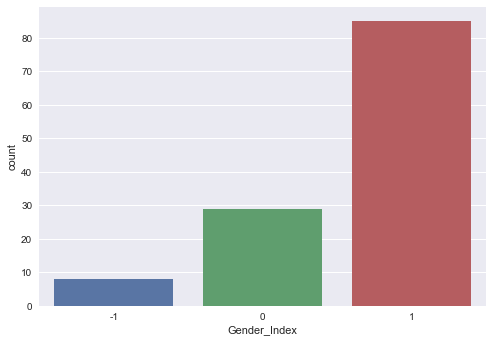

In [37]:
import seaborn as sns
sns.countplot(HG_Data['Gender_Index'],label="Count")
plt.show()

In [39]:
### There are other Genders labels present as we have gotten -1
print(HG_Data.groupby('Gender').size())

Gender
Female    29
Male      85
Mamale     1
Robo       1
dtype: int64


In [40]:
### Either drop or count them as another label, more of a business call
# I am droppping it
HG_Data=HG_Data[HG_Data.Gender_Index != -1]

In [45]:
print(HG_Data.groupby('Gender').size())

Gender
Female    29
Male      85
dtype: int64


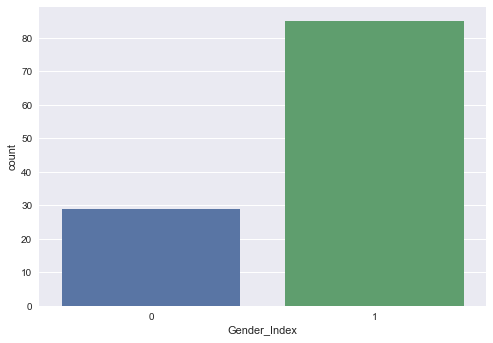

In [42]:
import seaborn as sns
sns.countplot(HG_Data['Gender_Index'],label="Count")
plt.show()

In [46]:
#Data is not evenly distributed,KNN should not but other Models can get Biased
HG_Data

,Height (cm),Weight (Kg),Gender,Gender_Index
0,178,80,Male,1
1,175,95,Male,1
2,175,80,Male,1
3,168,79,Male,1
4,173,85,Male,1
5,174,72,Male,1
6,165,66,Female,0
7,168,68,Female,0
8,157,70,Female,0
9,183,98.3,Male,1


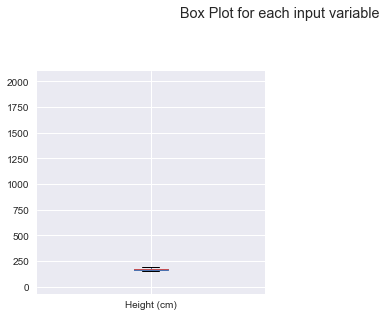

In [43]:
HG_Data.drop('Gender_Index', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('Height-Weight-Gender_boxplot')
plt.show()

In [47]:
print(HG_Data.describe())
HG_Data




       Gender_Index
count    114.000000
mean       0.745614
std        0.437438
min        0.000000
25%        0.250000
50%        1.000000
75%        1.000000
max        1.000000


,Height (cm),Weight (Kg),Gender,Gender_Index
0,178,80,Male,1
1,175,95,Male,1
2,175,80,Male,1
3,168,79,Male,1
4,173,85,Male,1
5,174,72,Male,1
6,165,66,Female,0
7,168,68,Female,0
8,157,70,Female,0
9,183,98.3,Male,1


In [51]:
#HG_Data['Height (cm)'] = HG_Data['Height (cm)'].astype(float)
#HG_Data['Weight (Kg)'] = HG_Data['Weight (Kg)'].astype(float)
#Unable to make the data numeric as there seems to be some non numeric data, cleansing it now

In [ ]:
HG_Data.applymap(lambda x: isinstance(x, (int, float)))

In [54]:
#we first drop all the data_columns from the HG_Data, 
#and then use a join to put them back in after passing them through pd.to_numeric (with option 'coerce', 
#such that all non-numeric entries are converted to NaN). 
#The result is saved to numeric_HG_Data. 

data_columns = ['Height (cm)', 'Weight (Kg)']
numeric_HG_Data = (HG_Data
          .drop(data_columns, axis=1)
          .join(HG_Data[data_columns].apply(pd.to_numeric, errors='coerce')))


In [55]:
numeric_HG_Data

,Gender,Gender_Index,Height (cm),Weight (Kg)
0,Male,1,178.000,80.0
1,Male,1,175.000,95.0
2,Male,1,175.000,80.0
3,Male,1,168.000,79.0
4,Male,1,173.000,85.0
5,Male,1,174.000,72.0
6,Female,0,165.000,66.0
7,Female,0,168.000,68.0
8,Female,0,157.000,70.0
9,Male,1,183.000,98.3


In [56]:
numeric_HG_Data[numeric_HG_Data[data_columns].notnull().all(axis=1)]

,Gender,Gender_Index,Height (cm),Weight (Kg)
0,Male,1,178.000,80.0
1,Male,1,175.000,95.0
2,Male,1,175.000,80.0
3,Male,1,168.000,79.0
4,Male,1,173.000,85.0
5,Male,1,174.000,72.0
6,Female,0,165.000,66.0
7,Female,0,168.000,68.0
8,Female,0,157.000,70.0
9,Male,1,183.000,98.3


In [58]:
numeric_HG_Data['Height (cm)'] = numeric_HG_Data['Height (cm)'].astype(float)
numeric_HG_Data['Weight (Kg)'] = numeric_HG_Data['Weight (Kg)'].astype(float)
#Now confirmed that all data is numeric and also no NANs

In [60]:
print(numeric_HG_Data.describe())

       Gender_Index  Height (cm)  Weight (Kg)
count    114.000000   113.000000   113.000000
mean       0.745614   188.589770    74.500000
std        0.437438   201.282427    20.934178
min        0.000000    30.000000   -20.000000
25%        0.250000   165.000000    64.000000
50%        1.000000   170.000000    72.000000
75%        1.000000   176.000000    85.000000
max        1.000000  1999.000000   180.000000


In [61]:
#There is NON +Ve data also in the dataset so now clean that up
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [113]:
numeric_HG_Data_No_Ot = numeric_HG_Data.loc[:, numeric_HG_Data.columns != 'Gender']
numeric_HG_Data_No_Ot
numeric_HG_Data_No_Ot=numeric_HG_Data_No_Ot.drop(['Gender_Index'], axis=1)
numeric_HG_Data_No_Ot

,Height (cm),Weight (Kg)
0,178.000,80.0
1,175.000,95.0
2,175.000,80.0
3,168.000,79.0
4,173.000,85.0
5,174.000,72.0
6,165.000,66.0
7,168.000,68.0
8,157.000,70.0
9,183.000,98.3


In [114]:
low = .05
high = .95
quant_df = numeric_HG_Data_No_Ot.quantile([low, high])
print(quant_df)


      Height (cm)  Weight (Kg)
0.05         68.8         51.8
0.95        183.8        104.4


In [115]:
numeric_HG_Data_No_Ot = numeric_HG_Data_No_Ot.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)
numeric_HG_Data_No_Ot

,Height (cm),Weight (Kg)
0,178.000,80.0
1,175.000,95.0
2,175.000,80.0
3,168.000,79.0
4,173.000,85.0
5,174.000,72.0
6,165.000,66.0
7,168.000,68.0
8,157.000,70.0
9,183.000,98.3


In [116]:
numeric_HG_Data_No_Ot = pd.concat([numeric_HG_Data.loc[:,'Gender'], numeric_HG_Data_No_Ot], axis=1)
numeric_HG_Data_No_Ot

,Gender,Height (cm),Weight (Kg)
0,Male,178.000,80.0
1,Male,175.000,95.0
2,Male,175.000,80.0
3,Male,168.000,79.0
4,Male,173.000,85.0
5,Male,174.000,72.0
6,Female,165.000,66.0
7,Female,168.000,68.0
8,Female,157.000,70.0
9,Male,183.000,98.3


In [124]:
numeric_HG_Data_No_Ot = pd.concat([numeric_HG_Data.loc[:,'Gender_Index'], numeric_HG_Data_No_Ot], axis=1)
numeric_HG_Data_No_Ot

,Gender_Index,Gender,Height (cm),Weight (Kg)
0,1,Male,178.000,80.0
1,1,Male,175.000,95.0
2,1,Male,175.000,80.0
3,1,Male,168.000,79.0
4,1,Male,173.000,85.0
5,1,Male,174.000,72.0
6,0,Female,165.000,66.0
7,0,Female,168.000,68.0
8,0,Female,157.000,70.0
9,1,Male,183.000,98.3


In [125]:
numeric_HG_Data_No_Ot.dropna(inplace=True)
print(numeric_HG_Data_No_Ot.head())

   Gender_Index Gender  Height (cm)  Weight (Kg)
0             1   Male        178.0         80.0
1             1   Male        175.0         95.0
2             1   Male        175.0         80.0
3             1   Male        168.0         79.0
4             1   Male        173.0         85.0


In [126]:
count_Height_nan = len(numeric_HG_Data_No_Ot['Height (cm)']) - numeric_HG_Data_No_Ot.count()
count_Height_nan

Gender_Index    0
Gender          0
Height (cm)     0
Weight (Kg)     0
dtype: int64

In [128]:
numeric_HG_Data_No_Ot.isnull().sum()

Gender_Index    0
Gender          0
Height (cm)     0
Weight (Kg)     0
dtype: int64

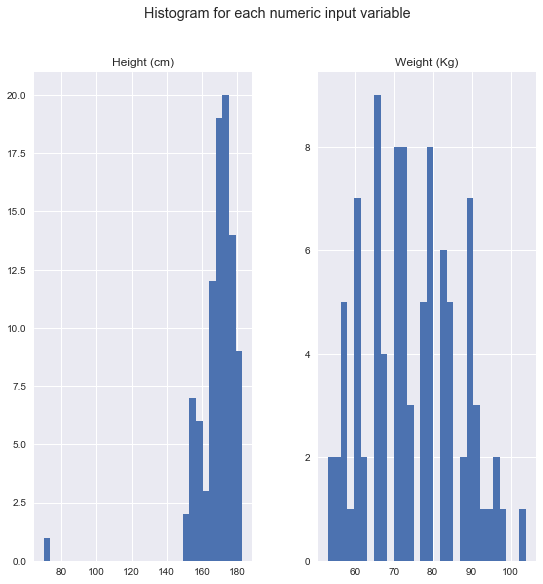

In [130]:
import pylab as pl
numeric_HG_Data_No_Ot.drop('Gender_Index' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('Height-Weight-Gender_Histogram')
plt.show()

In [136]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['Height (cm)', 'Weight (Kg)']
X = numeric_HG_Data_No_Ot[feature_names]
y = numeric_HG_Data_No_Ot['Gender_Index']

In [141]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('Height-Weight_scatter_matrix')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


In [180]:
feature_names = ['Height (cm)', 'Weight (Kg)']
X = numeric_HG_Data_No_Ot[feature_names]
y = numeric_HG_Data_No_Ot['Gender_Index']
hwg=numeric_HG_Data_No_Ot


In [192]:
cols = hwg.columns.tolist()
#cols[:-3]
#print(cols)
cols1 = cols[-2:] 
cols2 = cols[1:2] 
cols3 = cols[:1]
print('cols1',cols1)
print('cols2',cols2)
print('cols3',cols3)
cols = cols1+cols2+cols3
print(cols)
hwg=hwg[cols]
print(hwg)

cols1 ['Height', 'Weight']
cols2 ['Gender']
cols3 ['Gender_Index']
['Height', 'Weight', 'Gender', 'Gender_Index']
      Height  Weight  Gender  Gender_Index
0    178.000    80.0    Male             1
1    175.000    95.0    Male             1
2    175.000    80.0    Male             1
3    168.000    79.0    Male             1
4    173.000    85.0    Male             1
5    174.000    72.0    Male             1
6    165.000    66.0  Female             0
7    168.000    68.0  Female             0
8    157.000    70.0  Female             0
9    183.000    98.3    Male             1
10   176.000    96.0    Male             1
11   173.000    71.0    Male             1
14   175.000    90.0    Male             1
15   170.000    90.0  Female             0
16   180.000    89.0    Male             1
17   180.000    83.0    Male             1
18   167.000    60.0    Male             1
19   177.000    91.0    Male             1
21   171.000    77.0    Male             1
22   160.000    66.0  Fema

In [193]:
#hwg.columns['Height','Weight','Gender','Gender_Index']
hwg.rename(columns={'Height (cm)':'Height',
                    'Weight (Kg)':'Weight'}, 
                 inplace=True)

print(hwg)



      Height  Weight  Gender  Gender_Index
0    178.000    80.0    Male             1
1    175.000    95.0    Male             1
2    175.000    80.0    Male             1
3    168.000    79.0    Male             1
4    173.000    85.0    Male             1
5    174.000    72.0    Male             1
6    165.000    66.0  Female             0
7    168.000    68.0  Female             0
8    157.000    70.0  Female             0
9    183.000    98.3    Male             1
10   176.000    96.0    Male             1
11   173.000    71.0    Male             1
14   175.000    90.0    Male             1
15   170.000    90.0  Female             0
16   180.000    89.0    Male             1
17   180.000    83.0    Male             1
18   167.000    60.0    Male             1
19   177.000    91.0    Male             1
21   171.000    77.0    Male             1
22   160.000    66.0  Female             0
23   172.000    72.0    Male             1
24   180.000    90.0    Male             1
25   170.00

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


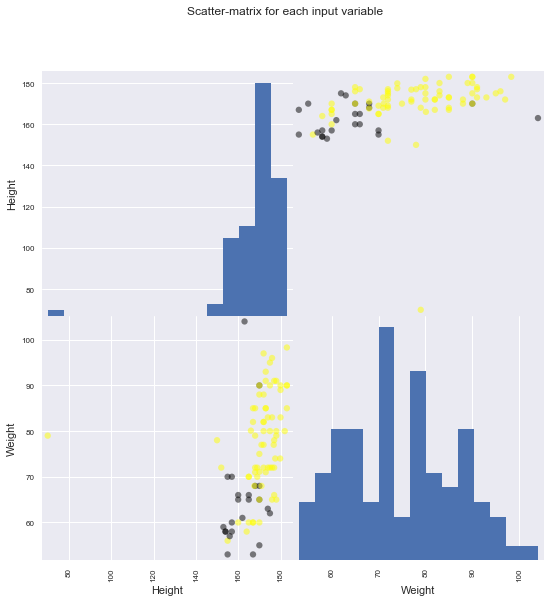

In [199]:
feature_names = ['Height', 'Weight']
X = hwg[feature_names]
y = hwg['Gender_Index']
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


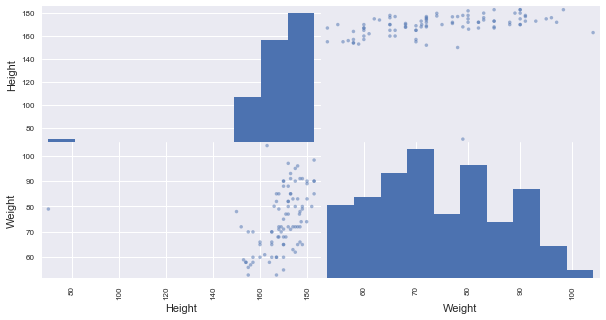

In [201]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(hwg.drop('Gender_Index', axis=1), figsize=(10, 5))
plt.show()

In [202]:
feature_names = ['Height', 'Weight']
X = hwg[feature_names]
y = hwg['Gender_Index']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


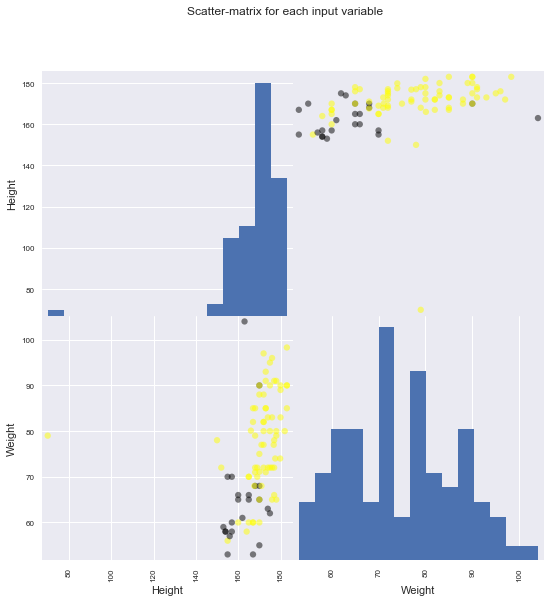

In [203]:
feature_names = ['Height', 'Weight']
X = hwg[feature_names]
y = hwg['Gender_Index']
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

In [216]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

In [217]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [218]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.68


In [219]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.74


In [242]:
#K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.75


In [221]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 3  3]
 [ 1 12]]
             precision    recall  f1-score   support

          0       0.75      0.50      0.60         6
          1       0.80      0.92      0.86        13

avg / total       0.78      0.79      0.78        19



In [237]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

X = hwg[['Height', 'Weight']]
y = hwg['Gender_Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


([<matplotlib.axis.XTick at 0xdaf7198>,
 <a list of 11 Text xticklabel objects>)

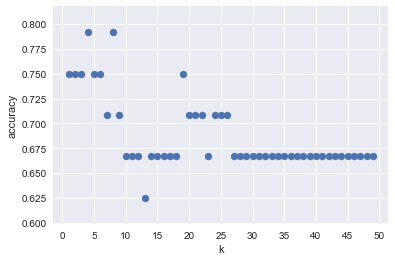

In [238]:
k_range = range(1, 50)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])